# Web Scraping

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import requests # Page requests

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/fua#search=1~gallery~0~0'
raw = requests.get(url,headers=header) # Get page

## 1. Pick something else on Craigslist: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of EDA you'd do with it.

I choose to look at **furniture** on Craigslist. I want to gather data on the **type**, **location** and **price**. With this, I can make histograms for the amount of furniture pieces in different locations. I can also create a KDP for the density of prices to see if there are any outliers.

In [18]:
from bs4 import BeautifulSoup as soup # HTML parser
bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

## 2. Get your search results of interest and extract data from them, using code similar to what's above.

In [19]:
import re # Regular expressions

types = ['chair', 'bench','cabinet','desk','rug','couch','mirror','table','stool','sofa',
          'bed','nightstand','dresser','headboard','mattress','lamp','art','vanity','drawers',
          'shelves','rack','picture','hutch', 'shelf']

data = [] # We'll save our listings in this object
for k in range( len(listings) ):
    title = listings[k].find('div',class_='title').get_text().lower()
    price = listings[k].find('div',class_='price').get_text()
    location = listings[k].find('div',class_='location')
    if location is None:
        location = 'missing'
    else:
        location = location.get_text().lower()
    link = listings[k].find(href=True)['href']
    # Get type of furniture from the title string:
    words = title.split()
    hits = [word for word in words if word in types] # Find types in the title
    if len(hits) == 0:
        f_type = 'missing'
    else:
        f_type = hits[0]
    #
    data.append({'title':title,'price':price,'link':link,'type':f_type, 'location':location})


With the data scraped from Craigslist, we can put it in a dataframe and wrangle it. Of course, price and year come in as text, not numbers, and need to be typecast/coerced:

With the data in and wrangled, we can now do EDA:

## 3. Wrangle your data, do some EDA, and make some plots. Try to find some interesting relationships or stories to tell about your data.

In [20]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['location'] = df['location'].str.replace('\n','')
print(df.shape)
df.to_csv('craigslist_cville_furniture.csv') # Save data in case of a disaster
df.head()

(360, 5)


,title,price,link,type,location
0,red oak live edge bench,160,https://charlottesville.craigslist.org/fuo/d/c...,bench,c'ville ...
1,great condition kitchen cabinet for sale $200 ...,200,https://charlottesville.craigslist.org/fuo/d/c...,cabinet,charlottesville ...
2,great condition chair $40 or best offer,40,https://charlottesville.craigslist.org/fuo/d/c...,chair,charlottesville ...
3,2pc desk,59,https://charlottesville.craigslist.org/fuo/d/b...,desk,bremo bluff ...
4,ladies' round back chair,35,https://charlottesville.craigslist.org/fuo/d/c...,chair,charlottesville ...


count     360.000000
mean      229.958333
std       587.892810
min         0.000000
25%        25.000000
50%        75.000000
75%       200.000000
max      5500.000000
Name: price, dtype: float64


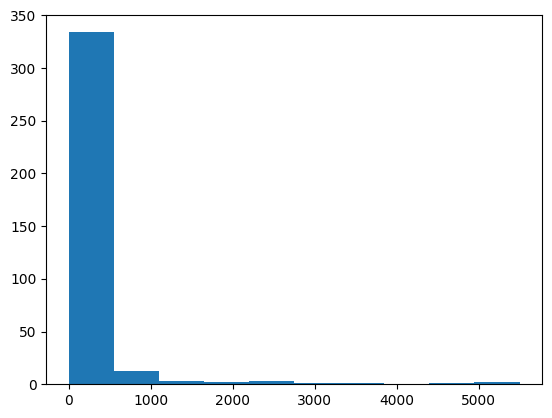

In [21]:
# EDA for price:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()

count         360
unique         24
top       missing
freq          134
Name: type, dtype: object


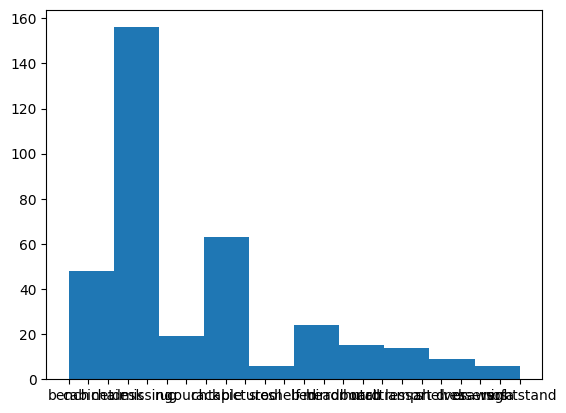

In [23]:
# EDA for type:
print(df['type'].describe())
df['type'].hist(grid=False)
plt.show()

count                                                   360
unique                                                   59
top                               charlottesville       ...
freq                                                     75
Name: location, dtype: object


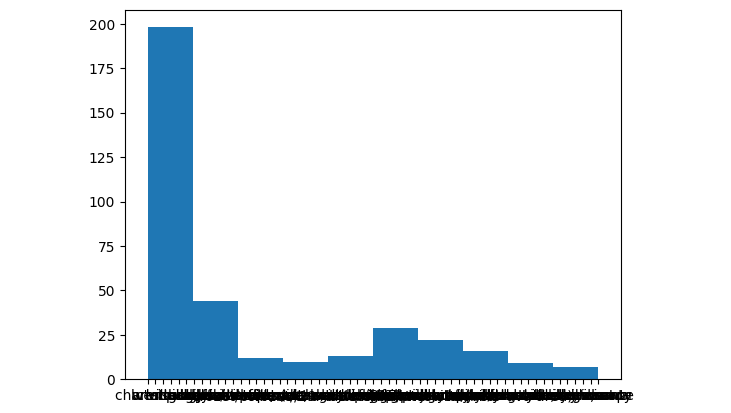

In [24]:
# EDA for location:
print(df['location'].describe())
df['location'].hist(grid=False)
plt.show()

In [22]:
# Price by type:
df.loc[:,['price','type']].groupby('type').describe()

price                                                        \
            count        mean          std    min     25%    50%    75%   
type                                                                      
art           7.0   71.428571    42.003401   20.0   40.00   75.0  100.0   
bed          17.0  272.000000   361.325511   10.0  100.00  200.0  250.0   
bench         3.0  220.000000   158.745079  100.0  130.00  160.0  280.0   
cabinet      16.0  127.500000   173.579953   20.0   20.00   62.5  162.5   
chair        29.0   89.206897   144.039523   10.0   20.00   35.0   75.0   
couch         9.0  243.888889   201.459949   75.0  100.00  200.0  300.0   
desk         22.0  137.000000   211.281126   10.0   20.00   39.5  175.0   
drawers       1.0  150.000000          NaN  150.0  150.00  150.0  150.0   
dresser       8.0  214.125000   165.922906   25.0  122.50  164.5  305.5   
headboard     1.0   25.000000          NaN   25.0   25.00   25.0   25.0   
hutch         4.0  134.250000   117.658758   49.0   49.75   94.5  179.0   
lamp          7.0   30.000000    19.866219    8.0   15.00   20.0   50.0   
mattress     10.0  160.000000   123.288280    0.0  100.00  110.0  237.5   
mirror        7.0   42.857143    33.523268   15.0   17.50   25.0   62.5   
missing     134.0  282.261194   677.117419    0.0   30.00   75.0  250.0   
nightstand    1.0   80.000000          NaN   80.0   80.00   80.0   80.0   
picture       5.0   18.000000     8.366600   10.0   10.00   20.0   20.0   
rack          7.0   38.285714    27.305154   15.0   20.00   28.0   52.5   
rug          10.0  417.400000   418.465238   39.0  168.75  350.0  475.0   
shelf         3.0   68.333333    28.431204   45.0   52.50   60.0   80.0   
shelves       1.0   20.000000          NaN   20.0   20.00   20.0   20.0   
sofa          4.0  480.250000   696.560777    1.0   37.75  212.5  655.0   
stool         3.0   52.666667    37.287174   10.0   39.50   69.0   74.0   
table        51.0  350.803922  1009.913898    0.0   37.00   75.0  140.0   

                    
               max  
type                
art          125.0  
bed         1500.0  
bench        400.0  
cabinet      700.0  
chair        650.0  
couch        700.0  
desk         750.0  
drawers      150.0  
dresser      497.0  
headboard     25.0  
hutch        299.0  
lamp          52.0  
mattress     350.0  
mirror       100.0  
missing     5500.0  
nightstand    80.0  
picture       30.0  
rack          80.0  
rug         1500.0  
shelf        100.0  
shelves       20.0  
sofa        1495.0  
stool         79.0  
table       5000.0

In [25]:
# Price by location:
df.loc[:,['price','location']].groupby('location').describe()

price               \
                                                   count         mean   
location                                                                
                        280 warrenton rd.      ...  14.0   339.642857   
                        315 willow lawn dr.    ...   1.0    22.000000   
                        afton va               ...   2.0  1875.000000   
                        afton,va               ...   1.0    30.000000   
                        albemarle              ...   1.0   200.000000   
                        albemarle/charlottesvil...   1.0    10.000000   
                        barboursville          ...   4.0   183.750000   
                        belmont                ...   3.0   125.000000   
                        bremo bluff            ...  11.0    96.636364   
                        c'ville                ...   1.0   160.000000   
                        charlottesville        ...  75.0   179.853333   
                        charlottesville (near u...   1.0    20.000000   
                        charlottesville (near u...   1.0    75.000000   
                        charlottesville va     ...   1.0    20.000000   
                        charlottesville, va    ...   1.0    60.000000   
                        charlottesville,virgini...   4.0  1282.250000   
                        crozet                       6.0   216.666667   
                        crozet va              ...   1.0    25.000000   
                        crozet, cville         ...   1.0    50.000000   
                        crozet/charlottesville ...   1.0    60.000000   
                        crozet/cville          ...   2.0    50.000000   
                        culpeper               ...   1.0    35.000000   
                        dillwyn                ...   1.0   200.000000   
                        dyke/nortonsville va   ...   4.0    66.250000   
                        earlysville            ...   1.0   250.000000   
                        esmont                       1.0  1500.000000   
                        forest lakes           ...   4.0   616.000000   
                        four seasons condos    ...   1.0    30.000000   
                        fry’s spring           ...   1.0   200.000000   
                        gordonsville           ...   2.0    67.500000   
                        gordonsville, va.      ...   2.0  1437.500000   
                        greene county          ...   1.0   820.000000   
                        hood                         1.0   100.000000   
                        ivy                          4.0   162.500000   
                        johnson village  cherry...   1.0    25.000000   
                        kent store va          ...   1.0   450.000000   
                        keswick                ...   3.0   416.666667   
                        lake monticello        ...   1.0   300.000000   
                        lexington              ...   6.0   375.000000   
                        louisa                      23.0    31.217391   
                        lovingston             ...   1.0    20.000000   
                        madison                ...   2.0   185.000000   
                        madison county         ...   2.0    62.500000   
                        nellysford             ...   2.0    50.000000   
                        new canton             ...   1.0    20.000000   
                        orange                       5.0  1225.000000   
                        palmyra                ...  36.0   220.611111   
                        palmyra, va            ...   1.0   450.000000   
                        rio/29                       1.0   275.000000   
                        roseland               ...   1.0    25.000000   
                        ruckersville           ...   9.0   135.555556   
                        scottsville            ...  19.0    71.947368   
                        stanardsvill

<Axes: xlabel='price', ylabel='Density'>

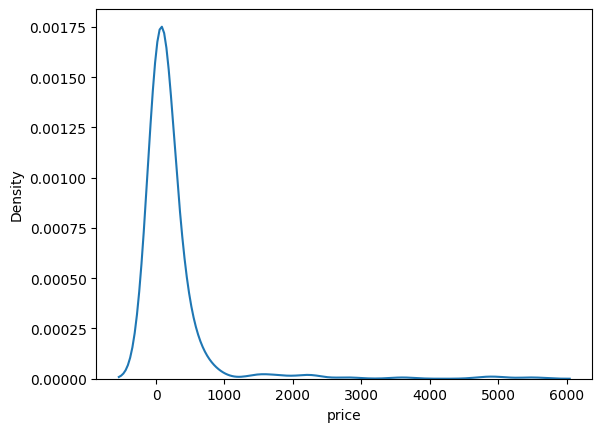

In [27]:
# KDP for price, grouped by type

sns.kdeplot(data=df, x='price')

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-28-a942fe48021c>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='log_price', hue='type')
/usr/local/lib

<Axes: xlabel='log_price', ylabel='Density'>

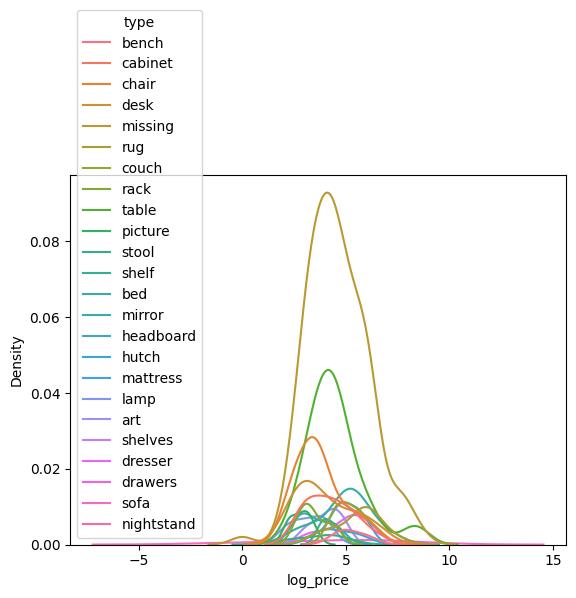

In [28]:
# scale price variable

df['log_price'] = np.log(df['price'])
sns.kdeplot(data=df, x='log_price', hue='type')